# Feature selection with L1 Regularization

* Consider a supervised learning setting where you have data $\mathcal{D} = \{(X, Y)\}$, where $X \in \mathbb{R}^{NXD}$. $N$  - num of datapoints and $D$ - num of features. Many of the features may be irrelevant for the task at hand.
* Typically when there are more features than samples, ie. $D >> N$, a simple linear regression model is prone to overfit.
* As we have seen before, regularization is one of the tools in our toolbox to combat overfitting. Here we will see how they do that and how $L1$ regularization can be used for feature selection.

## Tasks

1.  Load the data "cancer_reg.csv" data from [here](https://data.world/nrippner/ols-regression-challenge). A slightly modified copy will be shared with you on workplace.
2. Preprocess your data particularly making sure there are no nan values.
3. Split the data into 20\% train and 80\% test sets.
4. Define your linear regression model with and without regularization ($L1$ and $L2$)
5. Train and test your linear regression models (without regularization) till it overfits the data. Plot the learning curves for training and testing (You may ignore loss values for the first 10 epochs)
6. Train and test again with regularization and visually inspect the effects.
7. Plot the weights for each model (using matplotlib stem plot). Do you see any difference between them?
8. In the case of the $L1$ regularization, set a small threshold and remove all features of the data corresponding to the weights with values below this threshold.
9. Train a new model with remaining features (with or without regularization)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

## Load the data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/tut/cancer-mortality-rate.csv')

In [4]:
data.shape

(3047, 281)

In [5]:
data.head()

,Unnamed: 0,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,avgAnnCount-2,avgAnnCount-3,avgAnnCount-4,avgAnnCount-5,avgAnnCount-6,avgAnnCount-7,avgAnnCount-8,...,PctBlack-2,PctBlack-3,PctBlack-4,PctBlack-5,PctBlack-6,PctBlack-7,PctBlack-8,PctBlack-9,PctAsian-2,PctAsian-3,PctAsian-4,PctAsian-5,PctAsian-6,PctAsian-7,PctAsian-8,PctAsian-9,PctOtherRace-2,PctOtherRace-3,PctOtherRace-4,PctOtherRace-5,PctOtherRace-6,PctOtherRace-7,PctOtherRace-8,PctOtherRace-9,PctMarriedHouseholds-2,PctMarriedHouseholds-3,PctMarriedHouseholds-4,PctMarriedHouseholds-5,PctMarriedHouseholds-6,PctMarriedHouseholds-7,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9
0,0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1951609.0,2.726398e+09,3.808778e+12,5.320862e+15,7.433245e+18,1.038424e+22,1.450679e+25,...,6.732615,17.469307,45.328106,117.614122,305.176694,791.850616,2054.637228,5331.225430,23.250306,112.109653,540.576725,2606.583721,12568.574225,60603.868891,292223.195619,1.409058e+06,3.398413,6.264902,11.549212,21.290724,39.248992,72.354674,133.384289,245.891073,2793.764757,147667.442010,7.805122e+06,4.125481e+08,2.180567e+10,1.152562e+12,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07
1,1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,29929.0,5.177717e+06,8.957450e+08,1.549639e+11,2.680875e+13,4.637914e+15,8.023592e+17,...,0.939160,0.910142,0.882021,0.854768,0.828358,0.802764,0.777961,0.753923,5.045561,11.333503,25.457684,57.183879,128.448293,288.524742,648.093677,1.455769e+03,13.997711,52.370359,195.935921,733.065158,2742.654452,10261.234432,38390.885152,143633.796942,2058.663796,93406.723998,4.238097e+06,1.922930e+08,8.724816e+09,3.958667e+11,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05
2,2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,10404.0,1.061208e+06,1.082432e+08,1.104081e+10,1.126162e+12,1.148686e+14,1.171659e+16,...,0.547117,0.404688,0.299337,0.221411,0.163772,0.121138,0.089602,0.066277,0.217061,0.101128,0.047116,0.021951,0.010227,0.004765,0.002220,1.034235e-03,7.547978,20.736999,56.971967,156.522407,430.023135,1181.427634,3245.805027,8917.389410,2964.243692,161387.857618,8.786741e+06,4.783929e+08,2.604604e+10,1.418073e+12,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05
3,3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,182329.0,7.785448e+07,3.324386e+10,1.419513e+13,6.061321e+15,2.588184e+18,1.105155e+21,...,0.612503,0.479361,0.375160,0.293610,0.229787,0.179837,0.140745,0.110151,1.348754,1.566387,1.819137,2.112671,2.453569,2.849473,3.309260,3.843238e+00,1.856796,2.530151,3.447693,4.697975,6.401664,8.723184,11.886587,16.197177,2603.194940,132818.948317,6.776624e+06,3.457536e+08,1.764087e+10,9.000641e+11,4.592263e+13,2.343042e+15,21.19535

Q2 : Preprocess your data particularly making sure there are no nan values


# Data Preprocessing

Drop unnecessary column Unnamed: 0

In [6]:
data.drop(axis=1,columns='Unnamed: 0',inplace=True)

In [7]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,avgAnnCount-2,avgAnnCount-3,avgAnnCount-4,avgAnnCount-5,avgAnnCount-6,avgAnnCount-7,avgAnnCount-8,avgAnnCount-9,...,PctBlack-2,PctBlack-3,PctBlack-4,PctBlack-5,PctBlack-6,PctBlack-7,PctBlack-8,PctBlack-9,PctAsian-2,PctAsian-3,PctAsian-4,PctAsian-5,PctAsian-6,PctAsian-7,PctAsian-8,PctAsian-9,PctOtherRace-2,PctOtherRace-3,PctOtherRace-4,PctOtherRace-5,PctOtherRace-6,PctOtherRace-7,PctOtherRace-8,PctOtherRace-9,PctMarriedHouseholds-2,PctMarriedHouseholds-3,PctMarriedHouseholds-4,PctMarriedHouseholds-5,PctMarriedHouseholds-6,PctMarriedHouseholds-7,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1951609.0,2.726398e+09,3.808778e+12,5.320862e+15,7.433245e+18,1.038424e+22,1.450679e+25,2.026598e+28,...,6.732615,17.469307,45.328106,117.614122,305.176694,791.850616,2054.637228,5331.225430,23.250306,112.109653,540.576725,2606.583721,12568.574225,60603.868891,292223.195619,1.409058e+06,3.398413,6.264902,11.549212,21.290724,39.248992,72.354674,133.384289,245.891073,2793.764757,147667.442010,7.805122e+06,4.125481e+08,2.180567e+10,1.152562e+12,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,29929.0,5.177717e+06,8.957450e+08,1.549639e+11,2.680875e+13,4.637914e+15,8.023592e+17,1.388081e+20,...,0.939160,0.910142,0.882021,0.854768,0.828358,0.802764,0.777961,0.753923,5.045561,11.333503,25.457684,57.183879,128.448293,288.524742,648.093677,1.455769e+03,13.997711,52.370359,195.935921,733.065158,2742.654452,10261.234432,38390.885152,143633.796942,2058.663796,93406.723998,4.238097e+06,1.922930e+08,8.724816e+09,3.958667e+11,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,10404.0,1.061208e+06,1.082432e+08,1.104081e+10,1.126162e+12,1.148686e+14,1.171659e+16,1.195093e+18,...,0.547117,0.404688,0.299337,0.221411,0.163772,0.121138,0.089602,0.066277,0.217061,0.101128,0.047116,0.021951,0.010227,0.004765,0.002220,1.034235e-03,7.547978,20.736999,56.971967,156.522407,430.023135,1181.427634,3245.805027,8917.389410,2964.243692,161387.857618,8.786741e+06,4.783929e+08,2.604604e+10,1.418073e+12,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,182329.0,7.785448e+07,3.324386e+10,1.419513e+13,6.061321e+15,2.588184e+18,1.105155e+21,4.719010e+23,...,0.612503,0.479361,0.375160,0.293610,0.229787,0.179837,0.140745,0.110151,1.348754,1.566387,1.819137,2.112671,2.453569,2.849473,3.309260,3.843238e+00,1.856796,2.530151,3.447693,4.697975,6.401664,8.723184,11.886587,16.197177,2603.194940,132818.948317,6.776624e+06,3.457536e+08,1.764087e+10,

Re-arrange the columns , so that the target value be the last one

In [8]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('TARGET_deathRate'))
data = data[cols+['TARGET_deathRate']]

In [9]:
data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,avgAnnCount-2,avgAnnCount-3,avgAnnCount-4,avgAnnCount-5,avgAnnCount-6,avgAnnCount-7,avgAnnCount-8,avgAnnCount-9,avgDeathsPerYear-2,...,PctBlack-3,PctBlack-4,PctBlack-5,PctBlack-6,PctBlack-7,PctBlack-8,PctBlack-9,PctAsian-2,PctAsian-3,PctAsian-4,PctAsian-5,PctAsian-6,PctAsian-7,PctAsian-8,PctAsian-9,PctOtherRace-2,PctOtherRace-3,PctOtherRace-4,PctOtherRace-5,PctOtherRace-6,PctOtherRace-7,PctOtherRace-8,PctOtherRace-9,PctMarriedHouseholds-2,PctMarriedHouseholds-3,PctMarriedHouseholds-4,PctMarriedHouseholds-5,PctMarriedHouseholds-6,PctMarriedHouseholds-7,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1951609.0,2.726398e+09,3.808778e+12,5.320862e+15,7.433245e+18,1.038424e+22,1.450679e+25,2.026598e+28,219961,...,17.469307,45.328106,117.614122,305.176694,791.850616,2054.637228,5331.225430,23.250306,112.109653,540.576725,2606.583721,12568.574225,60603.868891,292223.195619,1.409058e+06,3.398413,6.264902,11.549212,21.290724,39.248992,72.354674,133.384289,245.891073,2793.764757,147667.442010,7.805122e+06,4.125481e+08,2.180567e+10,1.152562e+12,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,29929.0,5.177717e+06,8.957450e+08,1.549639e+11,2.680875e+13,4.637914e+15,8.023592e+17,1.388081e+20,4900,...,0.910142,0.882021,0.854768,0.828358,0.802764,0.777961,0.753923,5.045561,11.333503,25.457684,57.183879,128.448293,288.524742,648.093677,1.455769e+03,13.997711,52.370359,195.935921,733.065158,2742.654452,10261.234432,38390.885152,143633.796942,2058.663796,93406.723998,4.238097e+06,1.922930e+08,8.724816e+09,3.958667e+11,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,10404.0,1.061208e+06,1.082432e+08,1.104081e+10,1.126162e+12,1.148686e+14,1.171659e+16,1.195093e+18,2500,...,0.404688,0.299337,0.221411,0.163772,0.121138,0.089602,0.066277,0.217061,0.101128,0.047116,0.021951,0.010227,0.004765,0.002220,1.034235e-03,7.547978,20.736999,56.971967,156.522407,430.023135,1181.427634,3245.805027,8917.389410,2964.243692,161387.857618,8.786741e+06,4.783929e+08,2.604604e+10,1.418073e+12,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,182329.0,7.785448e+07,3.324386e+10,1.419513e+13,6.061321e+15,2.588184e+18,1.105155e+21,4.719010e+23,40804,...,0.479361,0.375160,0.293610,0.229787,0.179837,0.140745,0.110151,1.348754,1.566387,1.819137,2.112671,2.453569,2.849473,3.309260,3.843238e+00,1.856796,2.530151,3.447693,4.697975,6.401664,8.723184,11.886587,16.197177,2603.194940,132818.948317,6.776624e+06,3.457536e+08,1.764087e+10,9.000641e+1

In [10]:
data.shape

(3047, 280)

In [11]:
pd.set_option('max_columns',10000000)
pd.set_option('max_rows',10000000)

Dealing with Nan values

Number of empty cells or Nans in the datasets

In [12]:
data.isnull().sum()

avgAnnCount                     0
avgDeathsPerYear                0
incidenceRate                   0
medIncome                       0
popEst2015                      0
povertyPercent                  0
studyPerCap                     0
MedianAge                       0
MedianAgeMale                   0
MedianAgeFemale                 0
AvgHouseholdSize                0
PercentMarried                  0
PctNoHS18_24                    0
PctHS18_24                      0
PctSomeCol18_24              2285
PctBachDeg18_24                 0
PctHS25_Over                    0
PctBachDeg25_Over               0
PctEmployed16_Over            152
PctUnemployed16_Over            0
PctPrivateCoverage              0
PctPrivateCoverageAlone       609
PctEmpPrivCoverage              0
PctPublicCoverage               0
PctPublicCoverageAlone          0
PctWhite                        0
PctBlack                        0
PctAsian                        0
PctOtherRace                    0
PctMarriedHous

Fill Nan values with the mean

In [13]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

In [14]:
data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24              0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over           0
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone      0
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
avgAnnCount-2                0
avgAnnCo

In [15]:
data.corr()

Output hidden; open in https://colab.research.google.com to view.

## Normalize your data

In [16]:
def normalize_data(data):
   data.iloc[:, :-1] =  data.iloc[:, :-1]/ data.iloc[:, :-1].max()
   return data

Q3 : Split the data into 20% train and 80% test sets.

## Function to split the data to train and test

In [17]:
def split_data(df, split_percent):
    df = df.copy()
    df = normalize_data(df)
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    print(X)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    train_index = int((1 - split_percent) * len(indices))
    x_train, x_test = X[:train_index], X[train_index:]
    y_train, y_test = y[:train_index], y[train_index:]
    return x_train.to_numpy(),y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy()

Q4: Define your linear regression model with and without regularization ( L1  and  L2 )

## Linear Regression model

### Mini Batch Gradient Descent without Regularization

In [45]:
import numpy as np

class MBGD:
    "Implementation of batch gradient descent"
    def __init__(self, learning_rate = 1e-5 , batch_size = 16, max_iter = 500, initial_theta_strategy = 'normal', store_cost_while_fitting = False):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.initial_theta_strategy = initial_theta_strategy
        self.store_cost_while_fitting = store_cost_while_fitting
    
    def fit(self, X,y):
        """
        Computes the value of theta, 
        which is stored in self.theta,
        Parameters
        ------------------------------------------
        X: numoy array, an array of the features 
           also it should be scaled
        y: numpy array, an array of the target

        Returns
        ------------------------------------------
        None
        """
        X_arr = X # convert the data frame to numpy arrayk
        N = len(X_arr) # number of trainning examples
        y_arr = y.reshape((N,1)) # convert the data frame to numpy array
        d = len(X_arr[0]) # number of features
        assert self.batch_size < N # ensure that batch size is less than N        
        no_epochs = N // self.batch_size
        cost_arr = []
        self._initialize_theta(d)
        counter = 0
        while counter < self.max_iter:
            for i in range(no_epochs-1):
                X_current = X_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
                y_current = y_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
                self.theta -= self.learning_rate * X_current.T @ (X_current @ self.theta - y_current)
            if self.store_cost_while_fitting:
                # print(self.cost(X_arr, y_arr)[0][0])
                cost_arr.append(self.cost(X_arr, y_arr))
            counter += 1
        if self.store_cost_while_fitting:
            return cost_arr

    def predict(self, X):
        """
        Parameters
        ------------------------------------------
        X: numpy array, an array of the input features

        Returns
        ------------------------------------------
        result: numpy array, array of the predicted values
        """
        result = X @ self.theta
        return result
    def cost(self, X, y):
        """
        Parameters:
        ------------------------------------------
        X: numpy array, the input array
        y: numpy array, array of the target values

        Returns
        ------------------------------------------
        result: float, the mean squared error
        """
        N = len(X) # the number of training examples
        predictions = self.predict(X)
        result = np.dot((predictions.reshape(-1) - y.reshape(-1)).T, predictions.reshape(-1) - y.reshape(-1))/N
        return result

    def _initialize_theta(self,d):
        """
        Parameters:
        -----------------------------------------
        d: int, the number of features
        """
        if self.initial_theta_strategy == "normal":
            self.theta = np.random.randn(d,1)
        elif self.initial_theta_strategy == 'zeros':
            self.theta = np.zeros((d,1))
        elif self.initial_theta_strategy == 'ones':
            self.theta = np.ones((d,1))



    def train_test_error_calculate(self, X,y,X_test,y_test):
      """
      Computes the value of theta, 
      which is stored in self.theta,
      Parameters
      ------------------------------------------
      X: numoy array, an array of the features 
      also it should be scaled
      y: numpy array, an array of the target

      Returns
      ------------------------------------------
      None
      """
      X_arr = X # convert the data frame to numpy arrayk
      N = len(X_arr) # number of trainning examples
      y_arr = y.reshape((N,1)) # convert the data frame to numpy array
      d = len(X_arr[0]) # number of features
      assert self.batch_size < N # ensure that batch size is less than N        
      no_epochs = N // self.batch_size
      cost_arr = []
      cost_test_arr = []
      self._initialize_theta(d)
      counter = 0
      while counter < self.max_iter:
        for i in range(no_epochs-1):
           X_current = X_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
           y_current = y_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
           self.theta -= self.learning_rate * X_current.T @ (X_current @ self.theta - y_current)
        if self.store_cost_while_fitting:
           test_pred = self.predict(X_test)
           p_n = test_pred.reshape(len(test_pred))
           cost_test = np.sum((p_n - y_test)**2) / len(y_test)
           #print(cost_test)
           cost_test_arr.append(cost_test)
           cost_arr.append(self.cost(X_arr, y_arr))
        counter += 1
      if self.store_cost_while_fitting:
          return cost_arr , cost_test_arr

    

## Mini Batch Gradient Descent with Regularization

In [204]:
import numpy as np

class MBGD_Reg:
    "Implementation of batch gradient descent"
    def __init__(self, learning_rate = 1e-5 , batch_size = 16, max_iter = 500, initial_theta_strategy = 'normal', store_cost_while_fitting = False, l1 = 0, l2 = 0):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.initial_theta_strategy = initial_theta_strategy
        self.store_cost_while_fitting = store_cost_while_fitting
        self.l1 = l1
        self.l2 = l2
    
    def fit(self, X,y):
        """
        Computes the value of theta, 
        which is stored in self.theta,
        Parameters
        ------------------------------------------
        X: numoy array, an array of the features 
           also it should be scaled
        y: numpy array, an array of the target

        Returns
        ------------------------------------------
        None
        """
        X_arr = X # convert the data frame to numpy arrayk
        N = len(X_arr) # number of trainning examples
        y_arr = y.reshape((N,1)) # convert the data frame to numpy array
        d = len(X_arr[0]) # number of features
        assert self.batch_size < N # ensure that batch size is less than N        
        no_epochs = N // self.batch_size
        cost_arr = []
        self._initialize_theta(d)
        counter = 0
        while counter < self.max_iter:
            for i in range(no_epochs-1):
                X_current = X_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
                y_current = y_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
                self.theta -= self.learning_rate * (X_current.T @ (X_current @ self.theta - y_current) + self._reg_grad())
            if self.store_cost_while_fitting:
                cost_arr.append(self.cost(X_arr, y_arr))
            counter += 1
        if self.store_cost_while_fitting:
            return cost_arr

    def predict(self, X):
        """
        Parameters
        ------------------------------------------
        X: numpy array, an array of the input features

        Returns
        ------------------------------------------
        result: numpy array, array of the predicted values
        """
        result = X @ self.theta
        return result
    def cost(self, X, y):
        """
        Parameters:
        ------------------------------------------
        X: numpy array, the input array
        y: numpy array, array of the target values

        Returns
        ------------------------------------------
        result: float, the mean squared error
        """
        N = len(X) # the number of training examples
        predictions = self.predict(X)
        #result = np.dot((predictions.reshape(-1) - y.reshape(-1)).T, predictions.reshape(-1) - y.reshape(-1))/N
        result = np.sum((predictions.reshape(-1) - y.reshape(-1))**2) / N
        return result
    def train_test_error_calculate(self, X,y,X_test,y_test):
        """
        Computes the value of theta, 
        which is stored in self.theta,
        Parameters
        ------------------------------------------
        X: numoy array, an array of the features 
        also it should be scaled
        y: numpy array, an array of the target

        Returns
        ------------------------------------------
        None
        """
        X_arr = X # convert the data frame to numpy arrayk
        N = len(X_arr) # number of trainning examples
        y_arr = y.reshape((N,1)) # convert the data frame to numpy array
        d = len(X_arr[0]) # number of features
        assert self.batch_size < N # ensure that batch size is less than N        
        no_epochs = N // self.batch_size
        cost_arr = []
        cost_test_arr = []
        self._initialize_theta(d)
        counter = 0
        while counter < self.max_iter:
          for i in range(no_epochs-1):
              X_current = X_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
              y_current = y_arr[ i * self.batch_size : (i+1) * self.batch_size ,:]
              self.theta -= self.learning_rate * (X_current.T @ (X_current @ self.theta - y_current) + self._reg_grad())
          if self.store_cost_while_fitting:
              test_pred = self.predict(X_test)
              p_n = test_pred.reshape(len(test_pred))
              cost_test = np.sum((p_n - y_test)**2) / len(y_test)
              #print(cost_test)
              cost_test_arr.append(cost_test)
              cost_arr.append(self.cost(X_arr, y_arr))
          counter += 1
        if self.store_cost_while_fitting:
            return cost_arr , cost_test_arr


    def _initialize_theta(self,d):
        """
        initialize theta with values based on
        the attribute initial_theta_strategy
        Parameters:
        -----------------------------------------
        d: int, the number of features
        """
        if self.initial_theta_strategy == "normal":
            self.theta = np.random.randn(d,1)
        elif self.initial_theta_strategy == 'zeros':
            self.theta = np.zeros((d,1))
        elif self.initial_theta_strategy == 'ones':
            self.theta = np.ones((d,1))
    def _reg_grad(self):
        d = len(self.theta)
        return self.l2 * self.theta.reshape(d,1) + self.l1 * (2 * (self.theta > 0).astype(int) - 1).reshape(d,1) 

Q5 : Train and test your linear regression models (without regularization) till it overfits the data. Plot the learning curves for training and testing (You may ignore loss values for the first 10 epochs)

## Overfitting

In order to notice the effect of overfitting clearly , choose larger set for test values and smaller set for train values for example 0.2 for train & 0.8 for test .

## 1- Overfitting without Regularization

In [37]:
np.random.seed(10)
x_train,y_train, x_test, y_test = split_data(data, split_percent = 0.8)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [205]:
model = MBGD(store_cost_while_fitting=True, learning_rate=2e-3, max_iter=10000, batch_size= 50)

In [206]:
cost_train , cost_valid = model.train_test_error_calculate(x_train , y_train , x_test , y_test)

In [207]:
cost_train[-1]

295.35894142384154

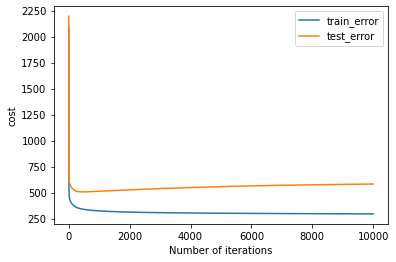

In [208]:
plt.plot(cost_train,label = 'train_error')
plt.plot(cost_valid , label = 'test_error')
plt.xlabel('Number of iterations')
plt.ylabel('cost')
plt.legend()
plt.show()

from the above plot , it is clear that the validation error increaces as the number of epochs increases

## 2- Overfitting with Regularization

**1- With 'l2'  Regularization**

In [189]:
np.random.seed(10)
x_train,y_train, x_test, y_test = split_data(data, split_percent = 0.8)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [199]:
model = MBGD_Reg(store_cost_while_fitting=True, learning_rate=2e-3, max_iter=100000, l1 = 0, l2 = .1 , batch_size = 50)

In [200]:
cost_train , cost_valid = model.train_test_error_calculate(x_train , y_train , x_test , y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<StemContainer object of 3 artists>

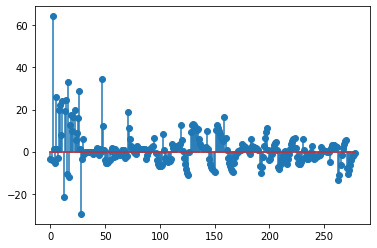

In [201]:
plt.stem(model.theta)

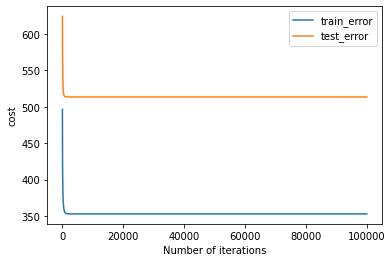

In [203]:
plt.plot(cost_train[10:],label = 'train_error')
plt.plot(cost_valid[10:] , label = 'test_error')
plt.xlabel('Number of iterations')
plt.ylabel('cost')
plt.legend()
plt.show()

I will try to play with lambda , and see how the value of lambda affect the overfitting curve 

In [213]:
def regularize_with_different_lamdas(start , end, data , split_ratio):
  np.random.seed(10)
  x_train,y_train, x_test, y_test = split_data(data, split_percent = split_ratio)
  for lamda in np.arange(start=start, stop=end, step=1):
    model = MBGD_Reg(store_cost_while_fitting=True, learning_rate=1e-3, max_iter=2000, l1 = 0, l2 = lamda)
    cost_train , cost_valid = model.train_test_error_calculate(x_train , y_train , x_test , y_test)
    plt.plot(cost_valid[10:] , label = 'test_error')
    plt.plot(cost_train[10:],label = 'train_error')
    plt.xlabel('Number of iterations')
    plt.ylabel('cost')
    plt.ylim(0,2000)
    plt.grid()
    plt.legend()
    plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



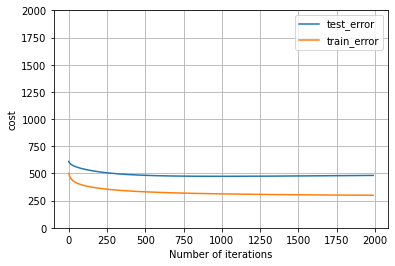

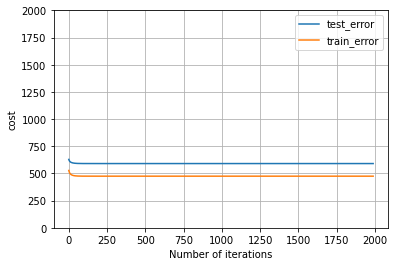

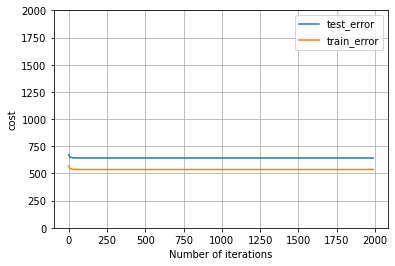

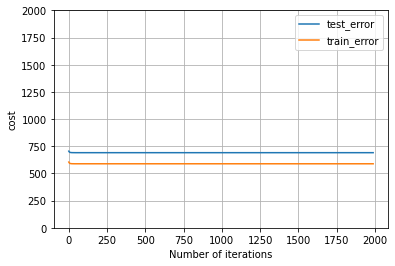

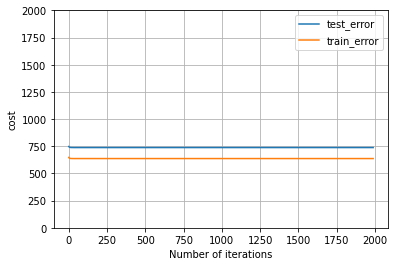

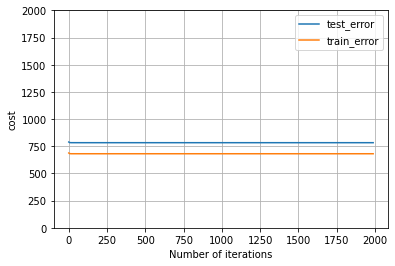

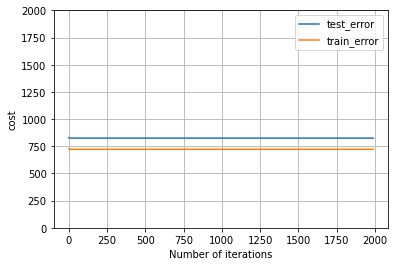

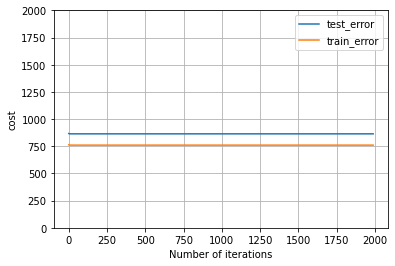

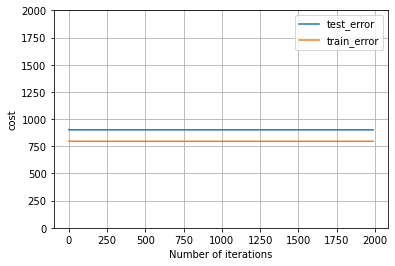

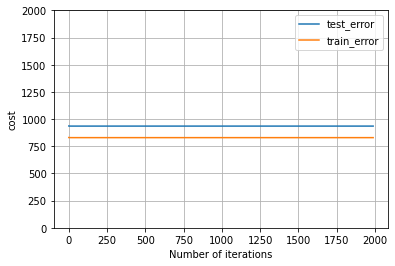

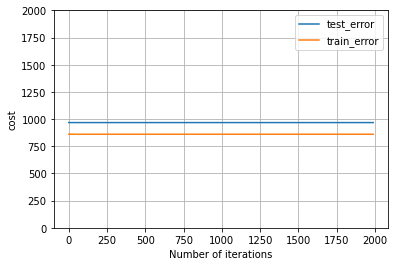

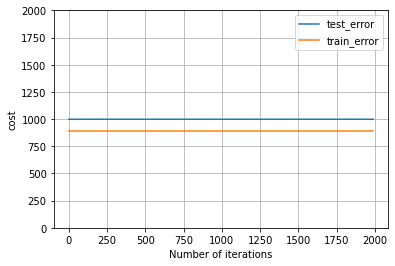

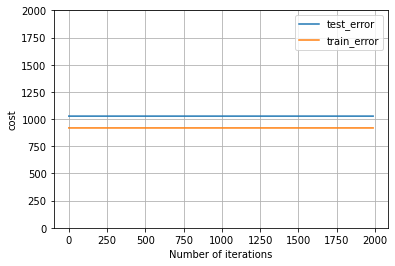

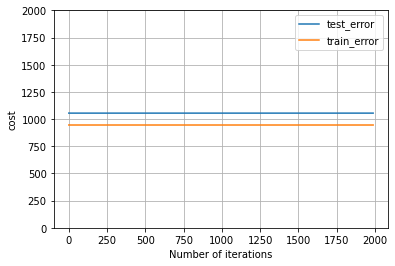

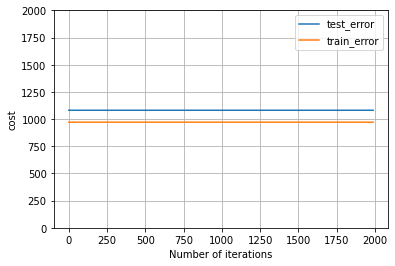

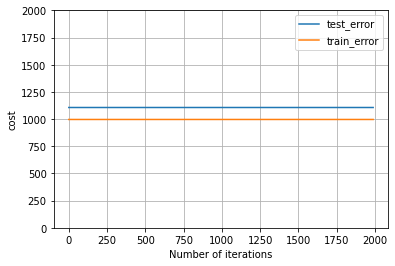

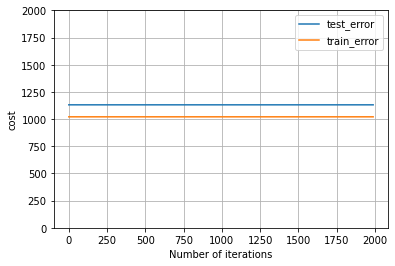

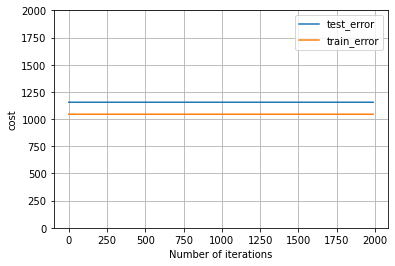

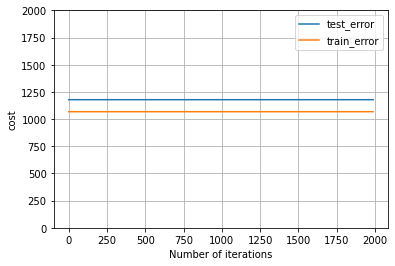

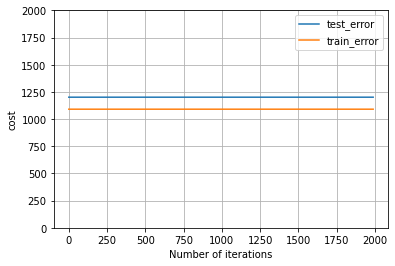

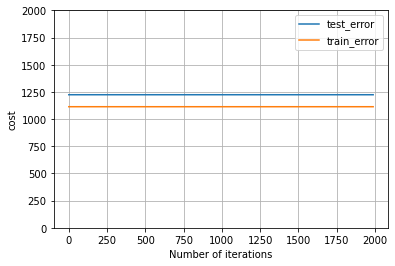

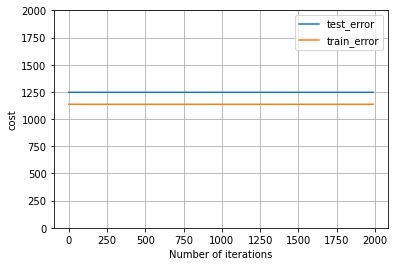

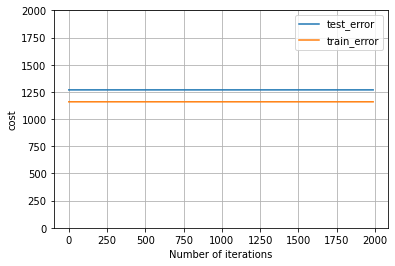

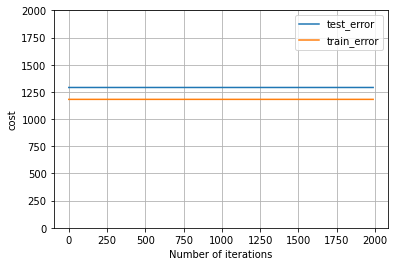

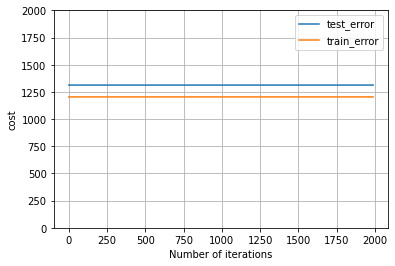

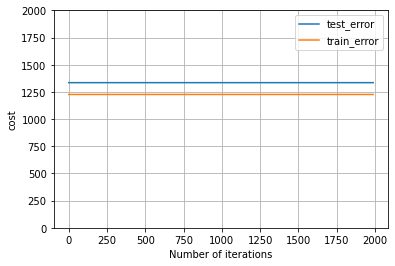

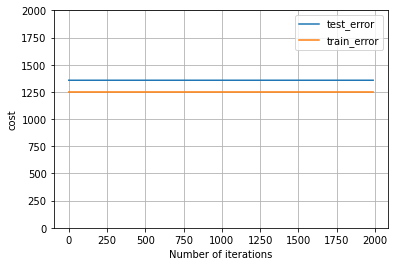

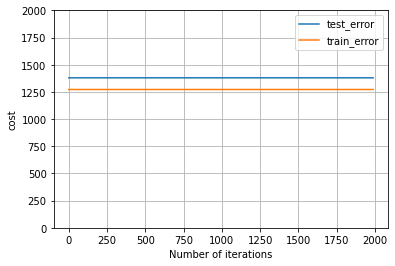

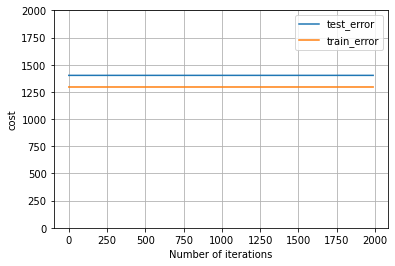

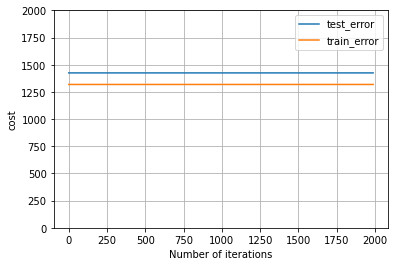

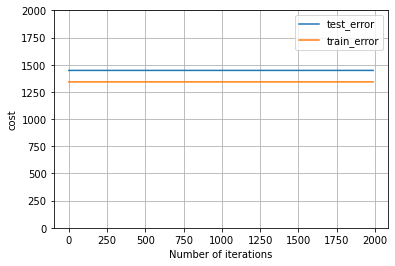

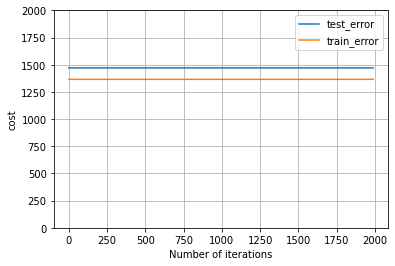

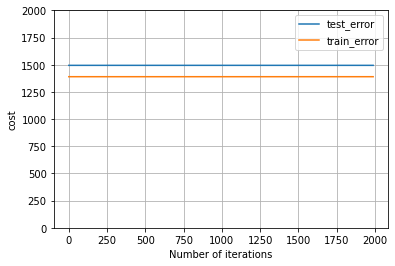

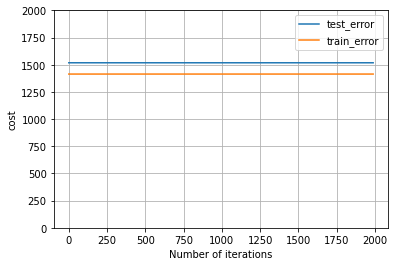

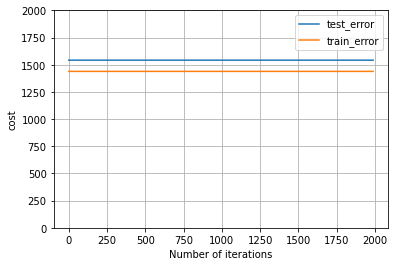

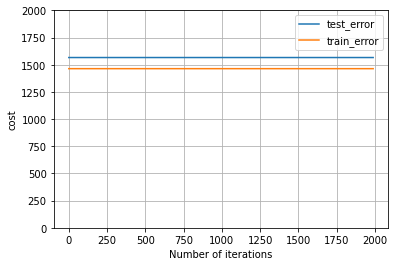

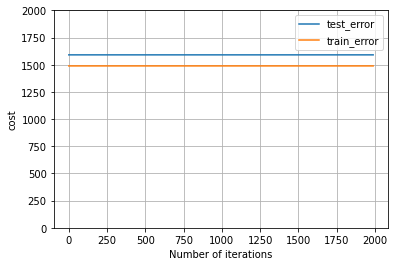

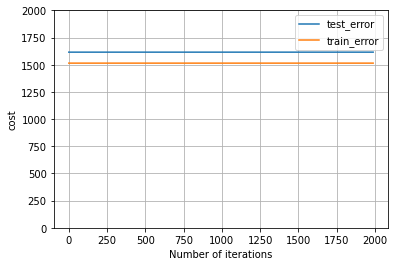

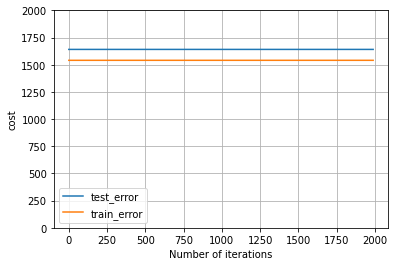

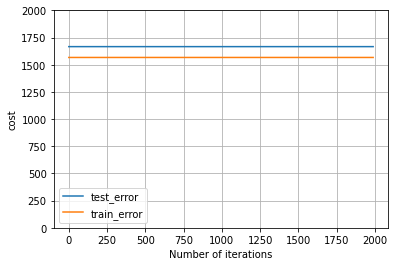

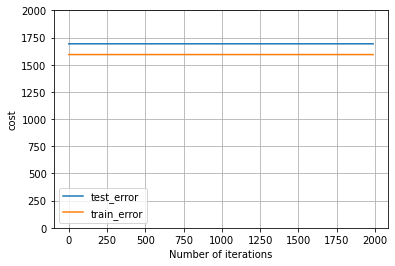

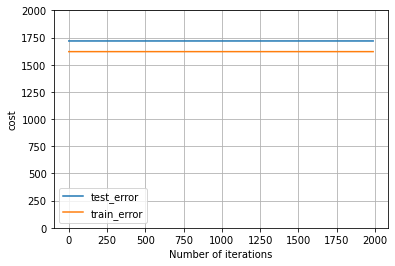

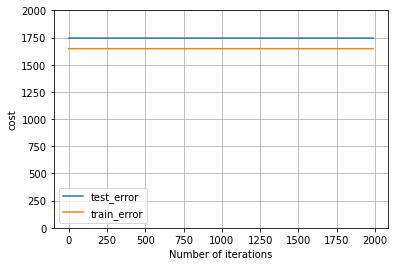

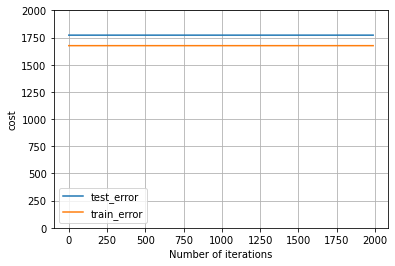

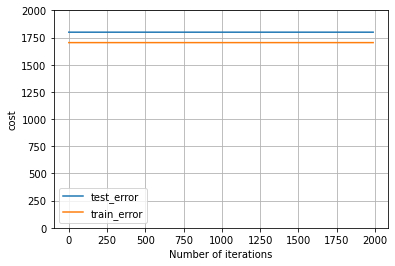

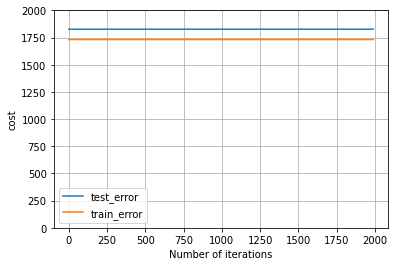

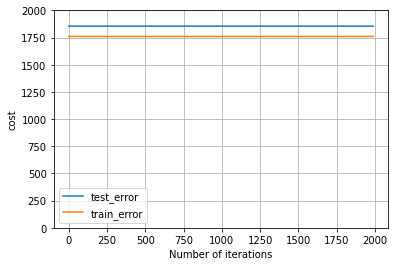

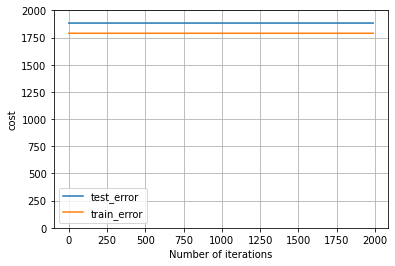

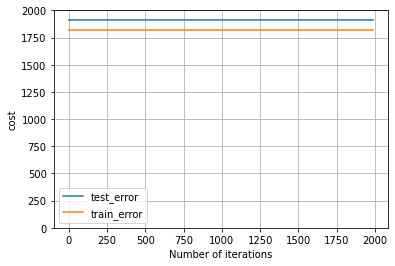

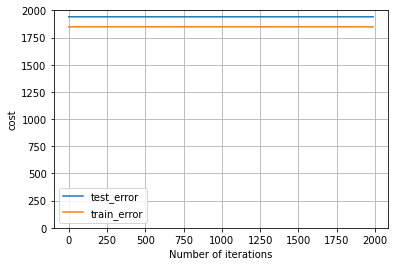

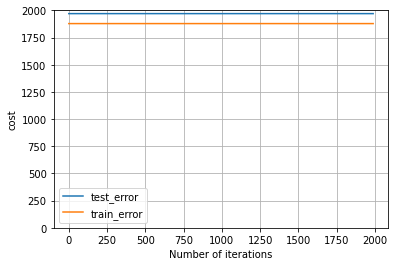

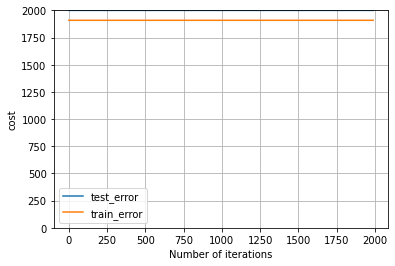

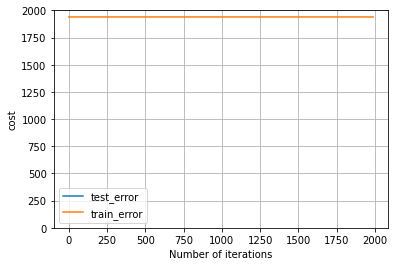

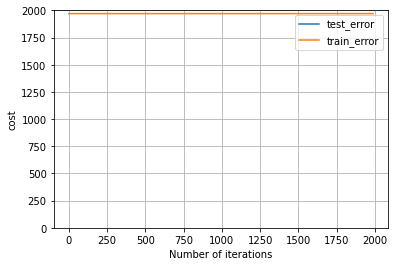

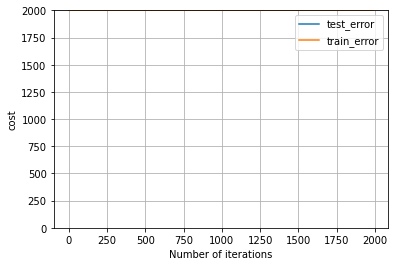

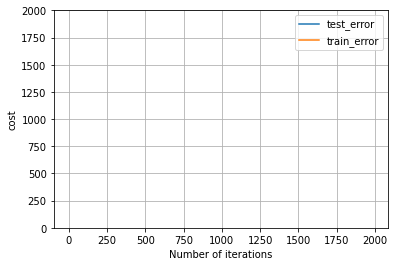

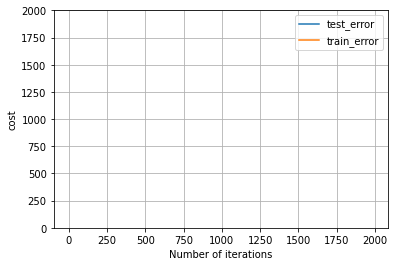

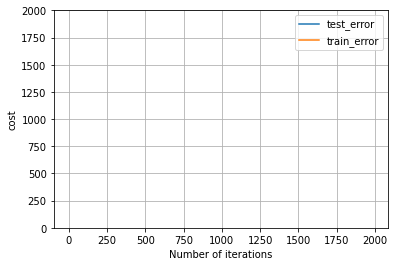

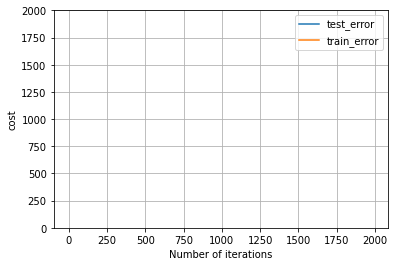

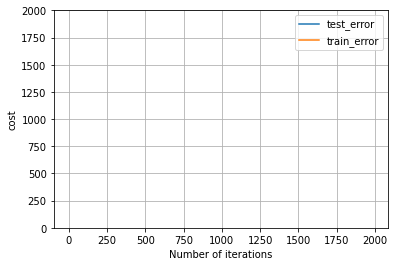

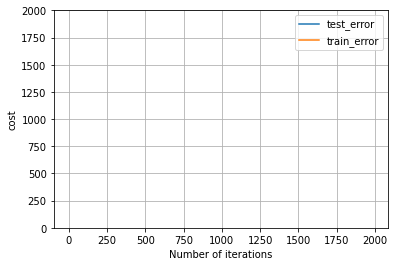

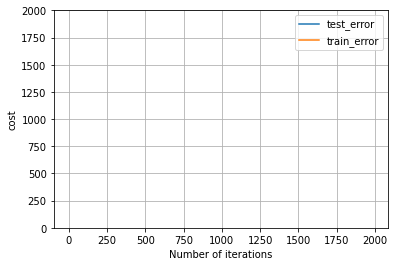

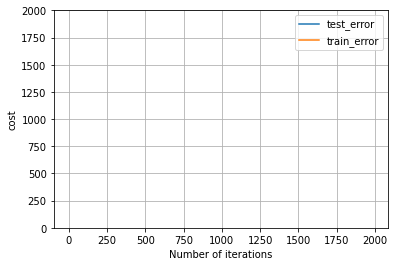

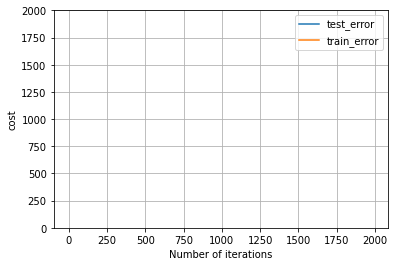

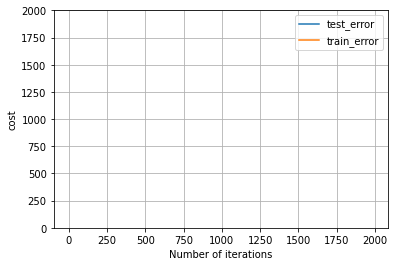

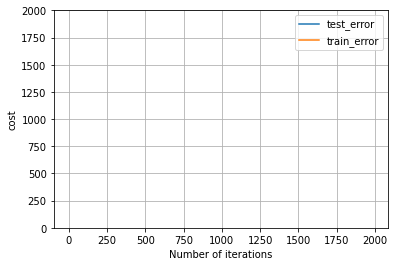

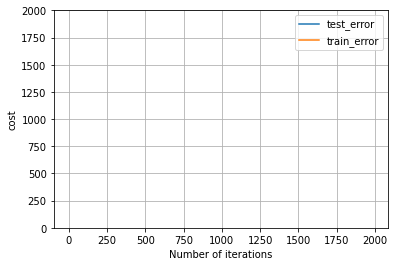

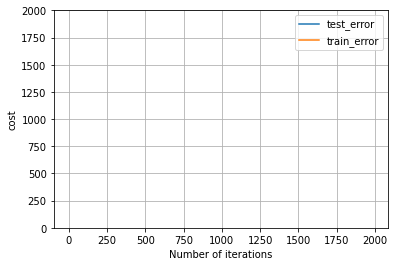

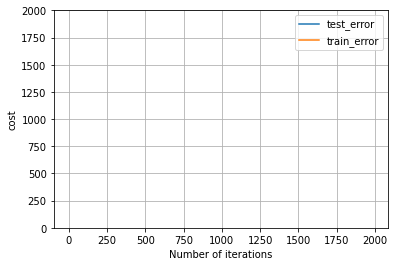

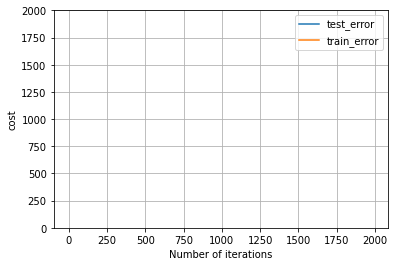

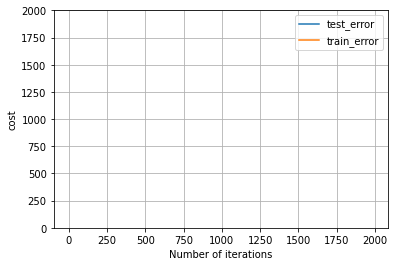

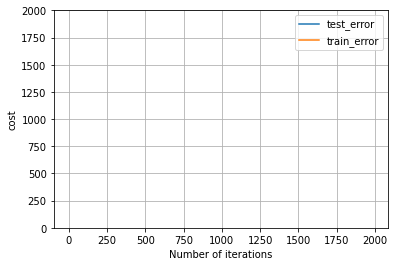

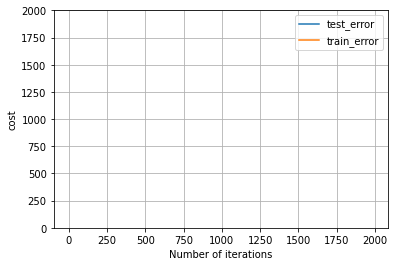

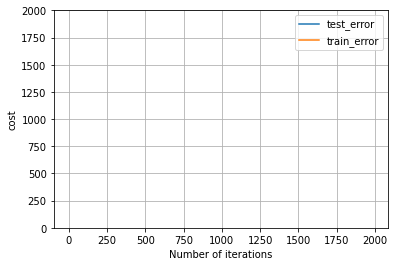

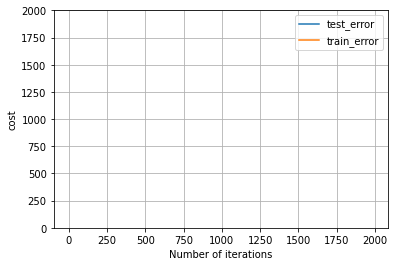

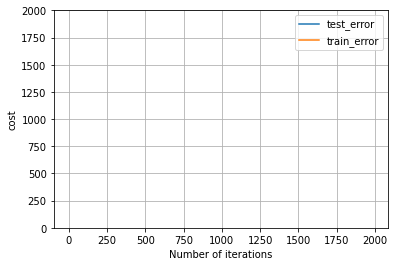

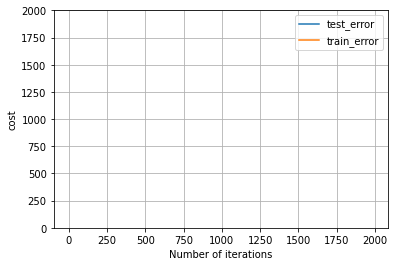

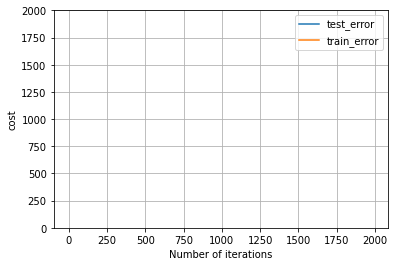

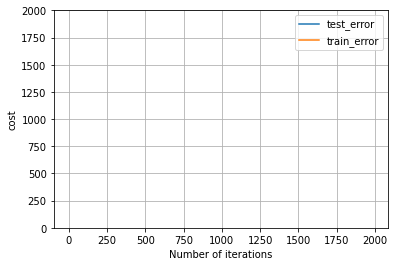

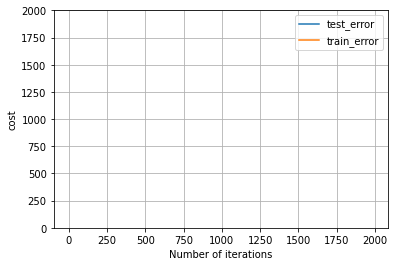

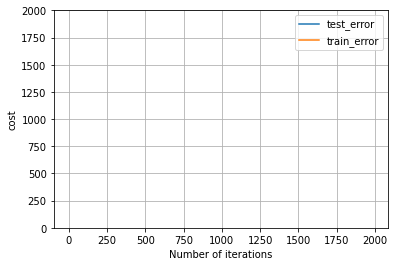

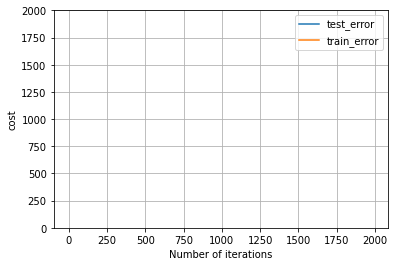

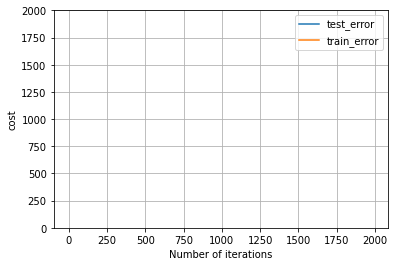

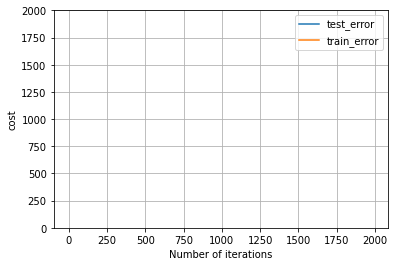

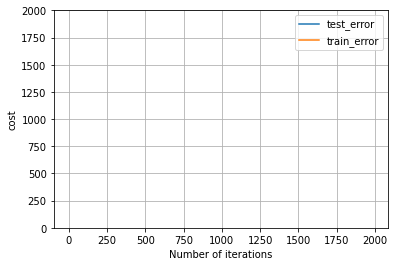

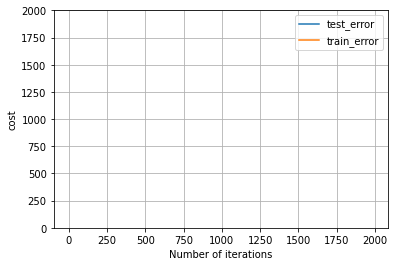

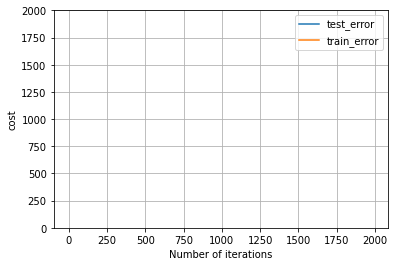

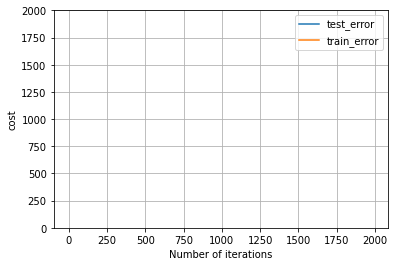

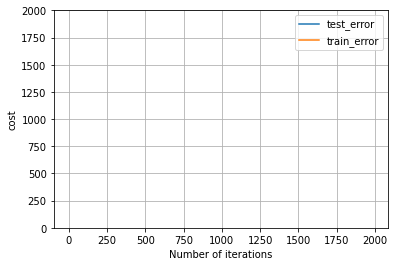

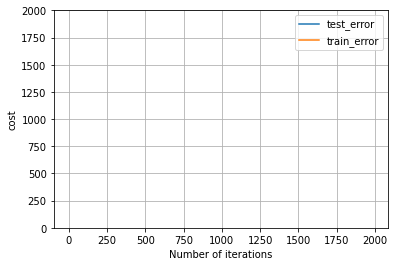

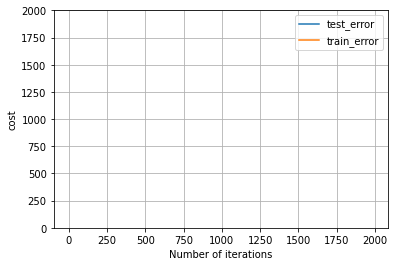

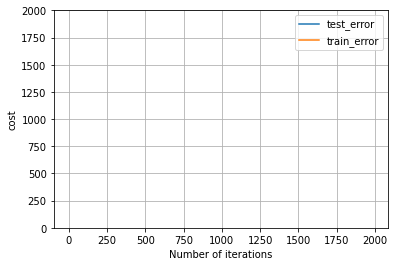

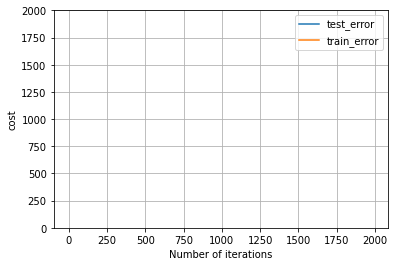

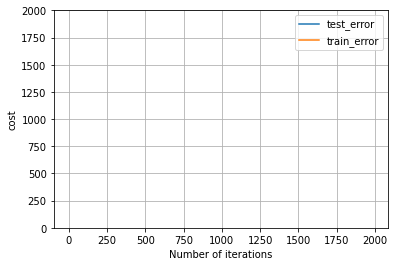

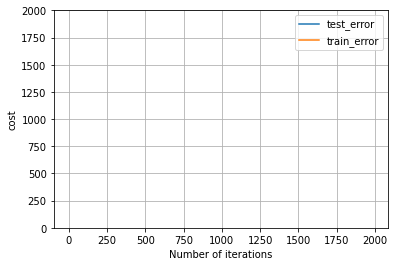

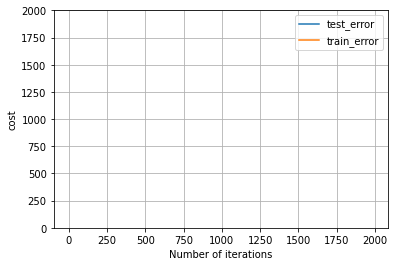

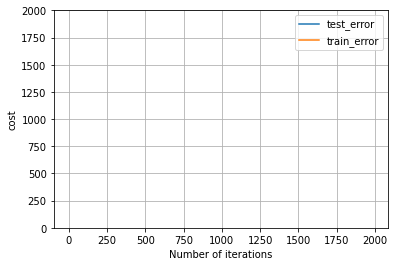

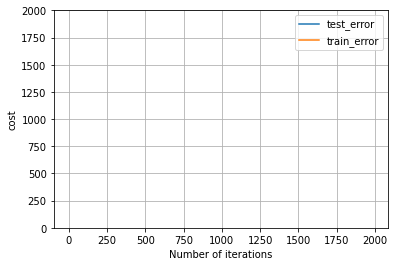

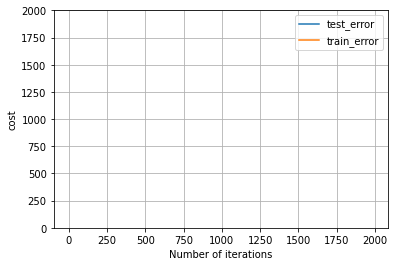

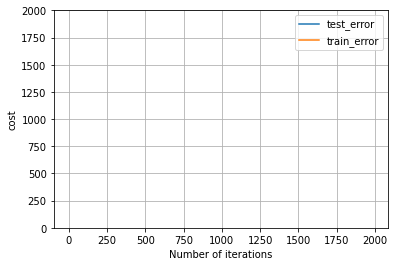

In [214]:
regularize_with_different_lamdas(0 , 100 , data , 0.8)

In [ ]:
params = dict(
    lr = [1e-2, 1e-3, 1e-5],
    lmda = [1, 2, 10],
    batchSize = [8, 16, 32]
)


In [ ]:
params.values()

dict_values([[0.01, 0.001, 1e-05], [1, 2, 10], [8, 16, 32]])

In [ ]:
from itertools import product


In [ ]:
combinations = product(*params.values())

In [ ]:
for i in combinations:
  print(i[0])